In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Read the url and create a dataframe
df = pd.read_html(url)
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [7]:
# Transform the dtype
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [8]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [9]:
mars_df.tail()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


### How many months exist on Mars?

In [10]:
months_on_mars = mars_df['month'].nunique()
print('There are', months_on_mars, 'months on Mars.')

There are 12 months on Mars.


### How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [11]:
martian_days = mars_df['sol'].max() - mars_df['sol'].min()
print('There are', martian_days, 'Martian days in this dataset.')

There are 1967 Martian days in this dataset.


### What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

In [12]:
temp_average = mars_df.groupby(['month'])['min_temp'].mean()
temp_average_min = temp_average.idxmin()
temp_average_max = temp_average.idxmax()
print(temp_average)
print('')
print('The coldest months on Mars is',temp_average_min, '.')
print('The warmest months on Mars is',temp_average_max, '.')

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

The coldest months on Mars is 3 .
The warmest months on Mars is 8 .


Text(0.5, 0, 'Months (on Mars)')

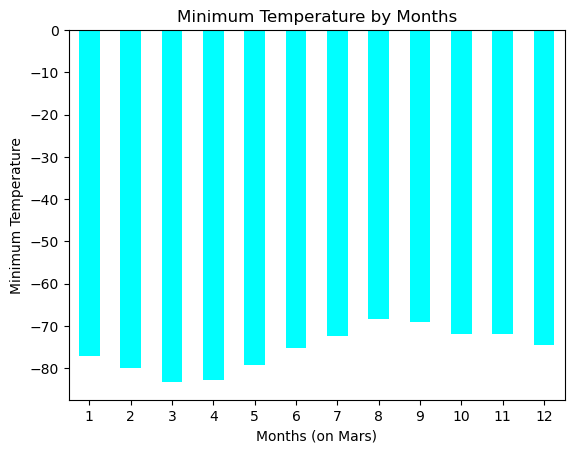

In [13]:
#Plot
temp_average.plot.bar(color = "cyan", rot=0)
plt.title("Minimum Temperature by Months")
plt.ylabel("Minimum Temperature")
plt.xlabel("Months (on Mars)")

### Which months have the lowest and the highest atmospheric pressure on Mars?

In [14]:
pressure_average = mars_df.groupby(['month'])['pressure'].mean()
pressure_average_min = pressure_average.idxmin()
pressure_average_max = pressure_average.idxmax()
print(pressure_average)
print('')
print('Month with the lowest atmospheric pressure:',pressure_average_min)
print('Month with the highest atmospheric pressure:', pressure_average_max)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Month with the lowest atmospheric pressure: 6
Month with the highest atmospheric pressure: 9


Text(0, 0.5, 'Atmospheric Pressure')

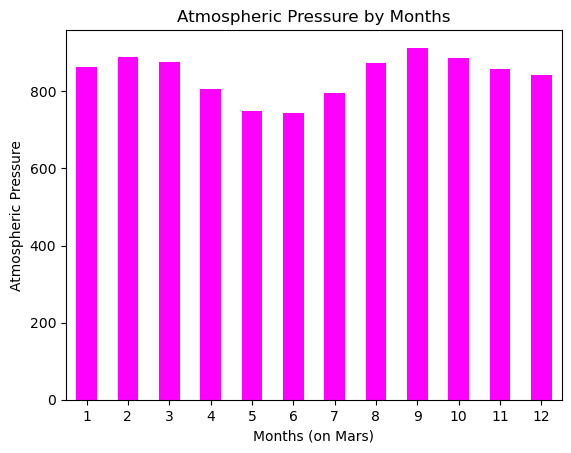

In [15]:
# plot
pressure_average.plot.bar(color = "magenta", rot=0)
plt.title("Atmospheric Pressure by Months")
plt.xlabel("Months (on Mars)")
plt.ylabel("Atmospheric Pressure")

### How many terrestrial days exist in a Martian year? 

In [16]:
mars_df.sort_values(by='terrestrial_date', na_position='first')

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [17]:
#Find the first date with month 1
mars_df_year_min = mars_df.groupby('month', sort=False)['terrestrial_date'].min()
mars_df_year_min

month
6    2012-08-16
7    2012-09-30
8    2012-11-20
9    2013-01-08
10   2013-02-24
11   2013-04-13
12   2013-06-05
1    2013-08-01
2    2013-10-03
3    2013-12-09
4    2014-02-16
5    2014-04-23
Name: terrestrial_date, dtype: datetime64[ns]

In [18]:
# Find out the date when the next year starts
date_df = mars_df.loc[mars_df['terrestrial_date']>'2014-04-23']
mars_df_year_max = date_df.groupby('month', sort=False)['terrestrial_date'].min()
mars_df_year_max

month
5    2014-04-24
6    2014-06-23
7    2014-08-18
8    2014-10-08
9    2014-11-25
10   2015-01-11
11   2015-03-02
12   2015-04-23
1    2015-06-19
2    2015-08-21
3    2015-10-27
4    2016-01-04
Name: terrestrial_date, dtype: datetime64[ns]

In [19]:
# Inicial date
d1 = datetime.strptime('2013-08-01', '%Y-%m-%d')
# Final date
d2 = datetime.strptime('2015-06-19', '%Y-%m-%d')

mars_df_year_mars = abs((d2 - d1).days)
print('There are', mars_df_year_mars, 'terrestrial days in a Martian year.')

There are 687 terrestrial days in a Martian year.


Text(0, 0.5, 'Minimum Temperature')

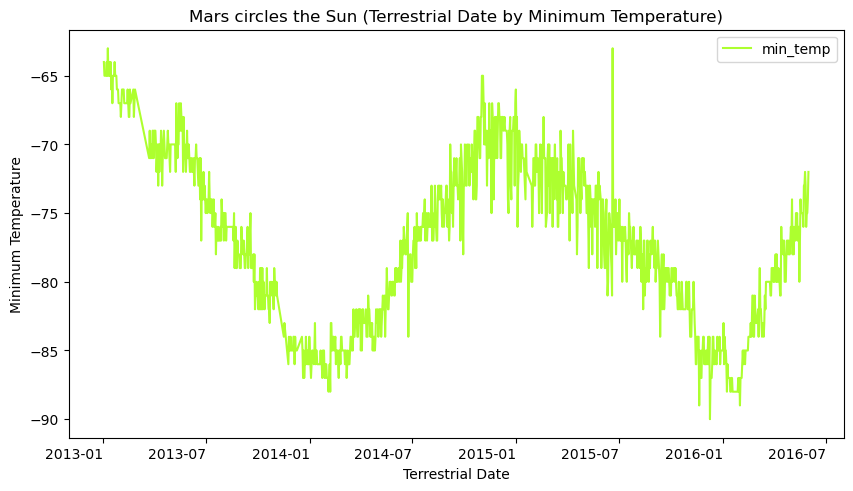

In [20]:
# Plot the results
date_df_year = mars_df.loc[(mars_df['terrestrial_date']>'2013-01-01') & (mars_df['terrestrial_date']<'2016-06-01')]

date_df_year.plot(figsize=(10, 6), x='terrestrial_date', y='min_temp', rot=0, color='greenyellow')
plt.title("Mars circles the Sun (Terrestrial Date by Minimum Temperature)")
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature")

In [21]:
mars_df.to_csv('mars_data.csv', index=True)

In [22]:
browser.quit()